In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns
import os

In [2]:
os.chdir('/media/bramiozo/DATA-FAST/kaggle/image_classification/MEDICAL')

In [4]:
train_meta = pd.read_csv('melanoma/TRAINING/ISIC_2020_train.csv')
test_meta = pd.read_csv('melanoma/TRAINING/ISIC_2020_test.csv')

In [5]:
train_meta.sort_values(by='age_approx', inplace=True)
train_meta['pat_age_diff']=train_meta.groupby(['patient_id','anatom_site_general_challenge']).age_approx.diff()

In [6]:
train_meta.sort_values(by='patient_id')

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,pat_age_diff
3085,ISIC_1024677,IP_0001230,female,50.0,torso,unknown,benign,0,NaN
20410,ISIC_6208944,IP_0001230,female,50.0,head/neck,unknown,benign,0,NaN
2117,ISIC_0733981,IP_0001230,female,50.0,oral/genital,unknown,benign,0,NaN
5406,ISIC_1716193,IP_0001230,female,50.0,torso,unknown,benign,0,0.0
4269,ISIC_1388032,IP_0001230,female,50.0,upper extremity,unknown,benign,0,NaN
...,...,...,...,...,...,...,...,...,...
7445,ISIC_2325607,IP_9997715,female,80.0,torso,unknown,benign,0,5.0
14225,ISIC_4362713,IP_9997715,female,75.0,torso,melanoma,malignant,1,NaN
18519,ISIC_5625747,IP_9997715,female,80.0,torso,unknown,benign,0,0.0
13078,ISIC_4023333,IP_9997715,female,75.0,lower extremity,unknown,benign,0,NaN


In [7]:
mean_one_year = train_meta[~pd.isna(train_meta.pat_age_diff)].target.mean()
mean_multi_year = train_meta[train_meta.pat_age_diff>0].target.mean()
mean_one_meas = train_meta[pd.isna(train_meta.pat_age_diff)].target.mean()

print(mean_one_meas, mean_one_year, mean_multi_year)

0.033303597977995834 0.013636363636363636 0.022969647251845776


In [8]:
train_meta[~pd.isna(train_meta.pat_age_diff)].groupby('pat_age_diff').agg({'target':  ['mean', 'count']})

target       
                  mean  count
pat_age_diff                 
0.0           0.012687  23962
5.0           0.020718   2172
10.0          0.046296    216
15.0          0.021739     46
20.0          0.000000      4

Clearly, there is a positive correlation between the time since the first image and the probability of a melanoma, which is very reasonable since tumors..grow in time.

In [9]:
train_meta[~pd.isna(train_meta.pat_age_diff)].groupby(['pat_age_diff', 'anatom_site_general_challenge']).agg({'target':  ['mean', 'count']})

target       
                                                mean  count
pat_age_diff anatom_site_general_challenge                 
0.0          head/neck                      0.028857    901
             lower extremity                0.010956   6024
             oral/genital                   0.035714     28
             palms/soles                    0.000000    103
             torso                          0.012236  13812
             upper extremity                0.013575   3094
5.0          head/neck                      0.054945     91
             lower extremity                0.013493    667
             oral/genital                   0.000000     10
             palms/soles                    0.019608     51
             torso                          0.019192    990
             upper extremity                0.030303    363
10.0         head/neck                      0.100000     10
             lower extremity                0.050847     59
             oral/genital                   0.000000      7
             palms/soles                    0.000000     17
             torso                          0.052632     57
             upper extremity                0.045455     66
15.0         head/neck                      0.000000      4
             lower extremity                0.090909     11
             oral/genital                   0.000000      1
             palms/soles                    0.000000      7
             torso                          0.000000     12
             upper extremity                0.000000     11
20.0         lower extremity                0.000000      1
             torso                          0.000000      2
             upper extremity                0.000000      1

In [10]:
train_meta.groupby(['sex', 'age_approx']).agg({'target': ['mean', 'count']})

target      
                       mean count
sex    age_approx                
female 10.0        0.000000    10
       15.0        0.025316    79
       20.0        0.009934   302
       25.0        0.004086   979
       30.0        0.005007  1398
       35.0        0.009079  1542
       40.0        0.006115  1799
       45.0        0.012251  1959
       50.0        0.008646  2082
       55.0        0.017094  1989
       60.0        0.012890  1474
       65.0        0.027142  1179
       70.0        0.020690   580
       75.0        0.048485   330
       80.0        0.073333   150
       85.0        0.075758    66
       90.0        0.133333    60
male   0.0         0.000000     2
       10.0        0.000000     7
       15.0        0.000000    53
       20.0        0.008499   353
       25.0        0.021239   565
       30.0        0.017708   960
       35.0        0.008410  1308
       40.0        0.007316  1777
       45.0        0.011966  2507
       50.0        0.015996  2188
       55.0        0.016349  1835
       60.0        0.026048  1766
       65.0        0.028190  1348
       70.0        0.033141  1388
       75.0        0.070661   651
       80.0        0.092937   269
       85.0        0.048193    83
       90.0        0.400000    20

We can wonder, what if one lesion is malignant for a patient, how does this affect the probability of the other lesions being malignant?

In [11]:
train_meta.target.mean()

0.01762965646320111

In [12]:
count_lesions = train_meta.groupby('patient_id').agg({'target': ['sum', 'count']})['target']

In [13]:
(count_lesions[count_lesions['sum']>0]['sum']-1).sum()/count_lesions[count_lesions['sum']>0]['count'].sum()

0.02252057167605024

Surprisingly malignancy in one lesion hardly impacts the probability of other lesions being malignant.

We can wonder if there is a relationship between the total number of images per patient and the probability that anyone of the lesions is melanomic.

In [14]:
count_lesions['sum']= count_lesions['sum'].apply(lambda x: 1 if x>0 else 0)

In [15]:
tmp = count_lesions.groupby('count').agg({'sum': 'mean'}).reset_index()

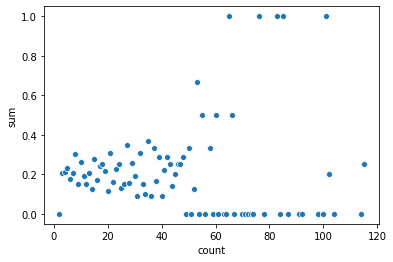

In [16]:
sns.scatterplot(data=tmp, x='count',y='sum')

We also hardly see a univariate relationship here.

Lastly, what is the overlap between the test and the train set in terms of patients?

In [17]:
set(train_meta.patient_id).intersection(set(test_meta.patient_id))

set()

Zero overlap :((

How accurate would a simple decision tree be on the meta features?

**If** a patient has a malignant lesion, what is the probability of the other lesions being malignant?

In [36]:
df = train_meta.groupby('patient_id').agg({'target': lambda x: np.count_nonzero(x),
                                      'image_name': 'count'})
df['proba_per_lesion'] = df[['target', 'image_name']].apply(lambda x: x[0]/x[1], axis=1)

In [48]:
df[df.target>0].target.value_counts()/df[df.target>0].shape[0]

1    0.745327
2    0.184579
3    0.049065
4    0.011682
5    0.004673
8    0.002336
6    0.002336
Name: target, dtype: float64